### Name : Kaushal Arvindbhai Dhanani
### UH id: 2154027

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

warnings.filterwarnings("ignore")
from scipy import stats


In [3]:
df = pd.read_csv('idea-2/stroke-prediction-dataset.zip')


In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.shape

(5110, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- We can see that 'bmi' column contains 201 NaN values. So we should either remove that entries or replace it with some other values.
- As 'bmi' is numerical variable, mean of the entire column shows the central tendency and we can replace all the missing values with average value of 'bmi' column.

In [8]:
# Calculate the average of the 'bmi' column
average_bmi = df['bmi'].mean()

# Replace NaN values in the 'bmi' column with the calculated average
df['bmi'].fillna(average_bmi, inplace=True)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


- Now, we'll check the datatypes of all variables and encode it into the datatypes that are accepted by Machine Learning models.
- ML models does not underdstand categorical variables, so we have to convert it in numerical columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- We currently have 4 categorical columns
1. gender
2. ever-married
3. Residence_type
4. work_type

- Now, we'll see the unique values for each categorical column, and if there are only two unique values in entire column, then we'll encode them in 0s and 1s.
- If there are more than 2 unique values, then we'll employ one hot encoding technique

In [10]:
print(df['ever_married'].unique())
print(df['Residence_type'].unique())
print(df['gender'].unique())

['Yes' 'No']
['Urban' 'Rural']
['Male' 'Female' 'Other']


- It is clear that all of the above shown column have only two unique values in them, so we can encode them in 0s and 1s.
1. For ever_married column --> '0': No and '1': Yes
2. For gender column --> '0': female and '1': male
3. For Residence-type -> '0':Rural and '1': Urban

In [11]:
df['ever_married'] = df.ever_married.map(lambda x: 0 if x == 'No' else 1)
df['Residence_type'] = df.Residence_type.map(lambda x: 0 if x == 'Rural' else 1)
df['gender'] = df.gender.map(lambda x: 0 if x == 'Female' else 1)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [12]:
print(df['smoking_status'].unique())
print(df['work_type'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


- As shown above, 'smoking_status' and 'work-type' have multiple unique values. Hence, we'll use one hot encoding techique on those columns

In [13]:
df = pd.get_dummies(df,columns=['work_type', 'smoking_status'], dtype=int)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


- Now, we can see that all the variables are converted in numerical datatypes. So we are ready on that part. Now, we'll go towards some data cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   gender                          5110 non-null   int64  
 2   age                             5110 non-null   float64
 3   hypertension                    5110 non-null   int64  
 4   heart_disease                   5110 non-null   int64  
 5   ever_married                    5110 non-null   int64  
 6   Residence_type                  5110 non-null   int64  
 7   avg_glucose_level               5110 non-null   float64
 8   bmi                             5110 non-null   float64
 9   stroke                          5110 non-null   int64  
 10  work_type_Govt_job              5110 non-null   int32  
 11  work_type_Never_worked          5110 non-null   int32  
 12  work_type_Private               51

- Visualizing Heatmap for Correlation

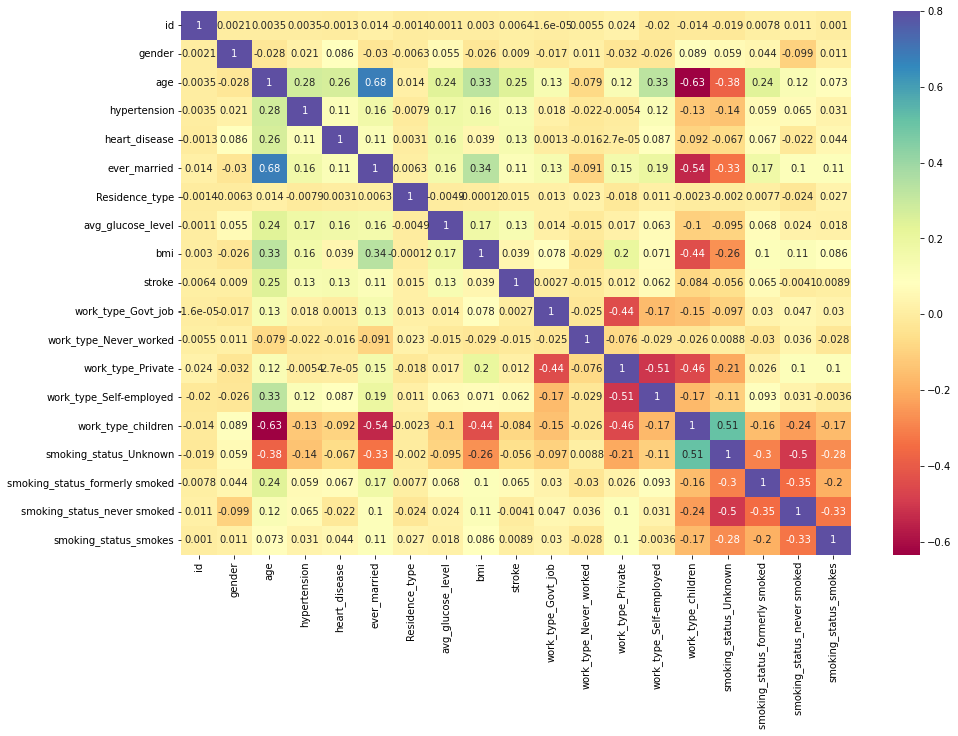

In [15]:
#Heat map to find the correlation between the variables.

correlation_matrix = df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,
            vmax=0.8,
            annot=True, 
            cmap="Spectral")
plt.show()

- We can remove the 'id' column as it just shows the number and is not important

In [16]:
df = df.drop('id', axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


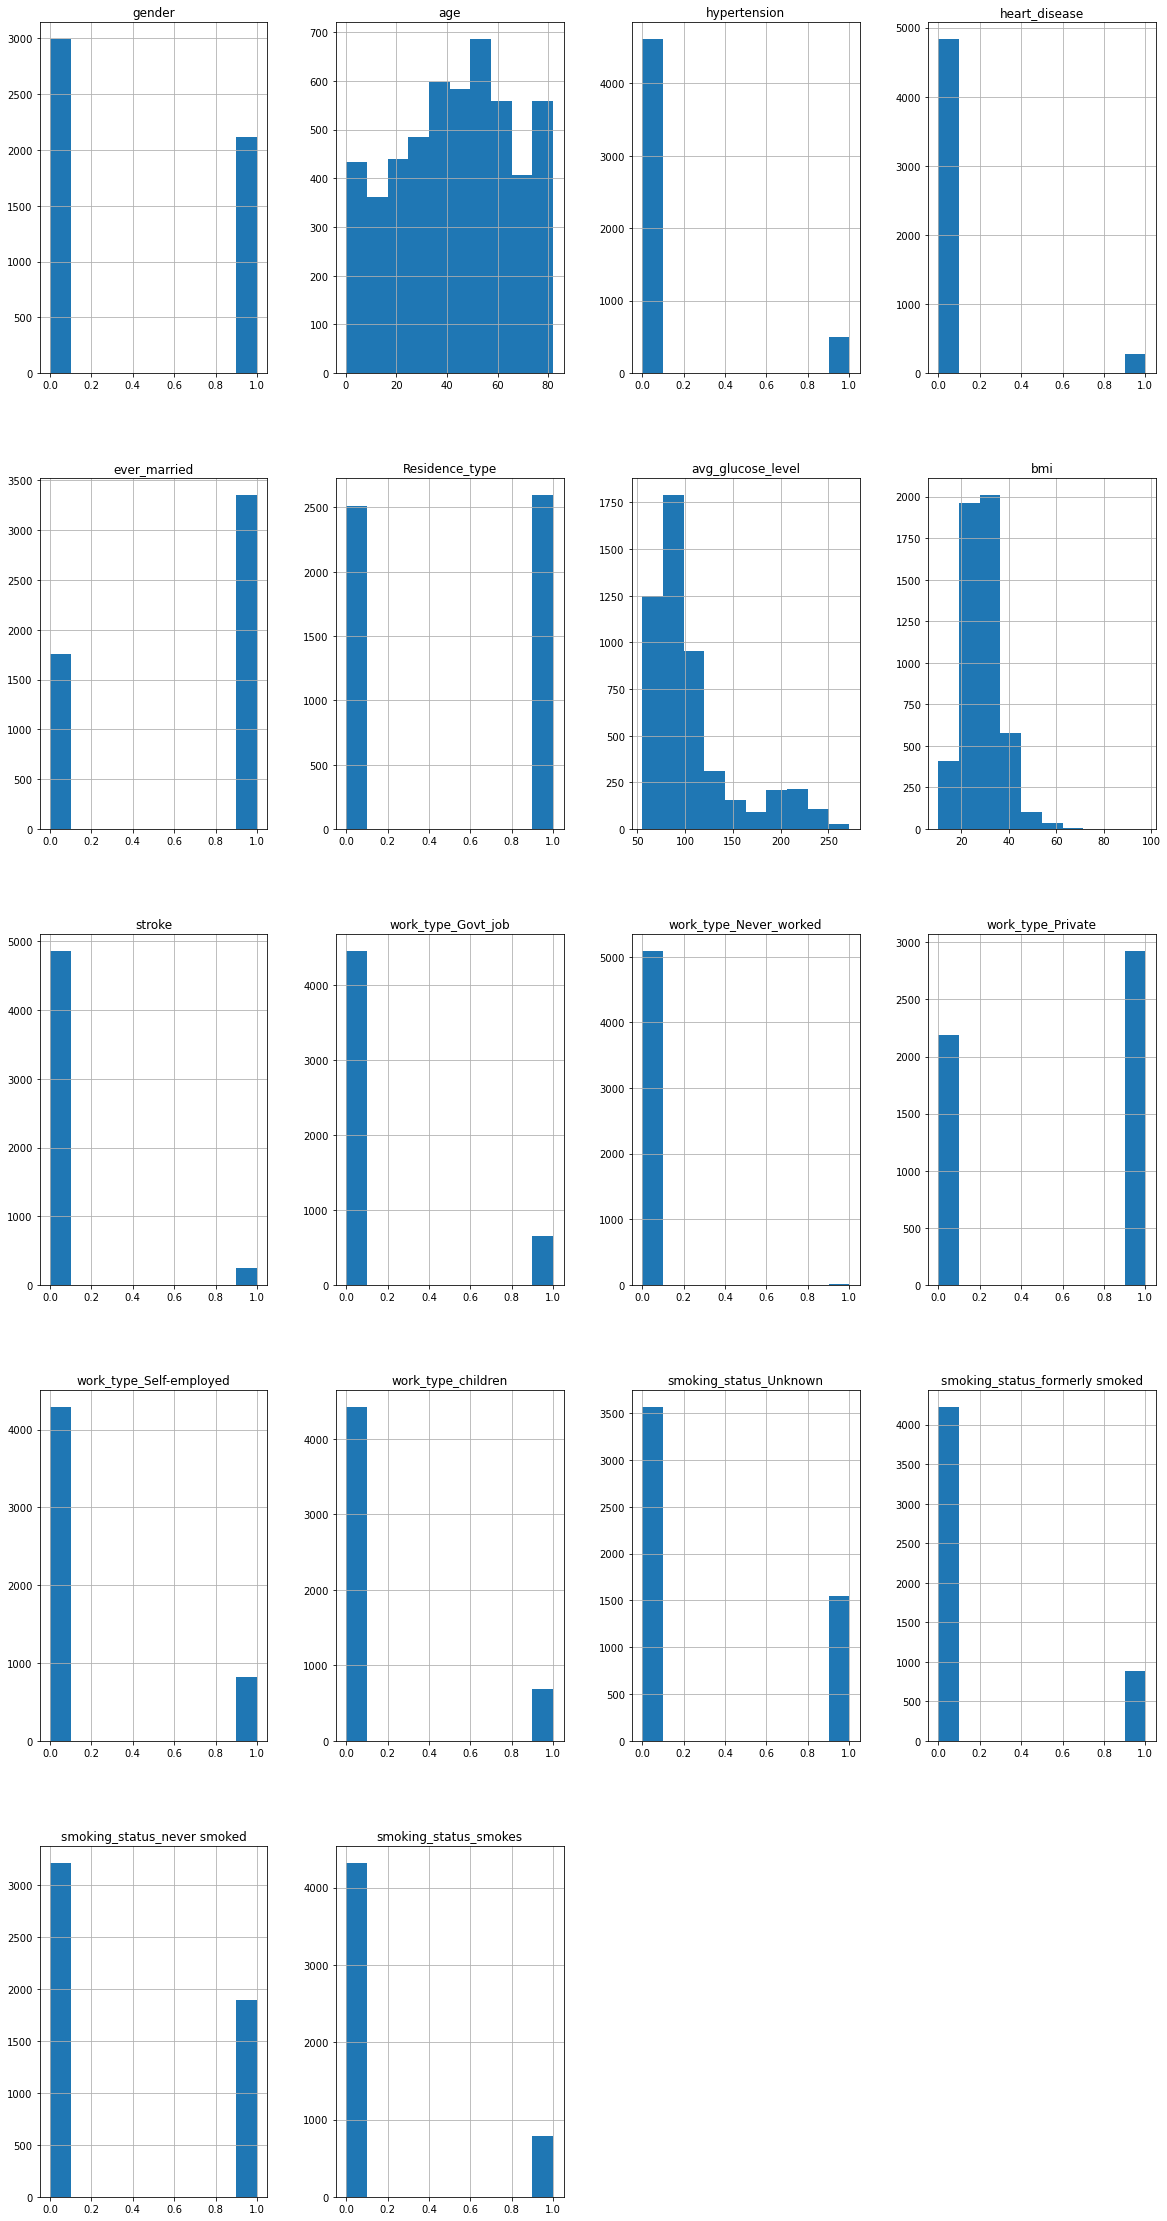

In [17]:
plot = df.hist(figsize = (20,40))

- Visual for Outlier detection

- We can see that 'avg_glucose_level' and 'bmi' columns contains most outliers

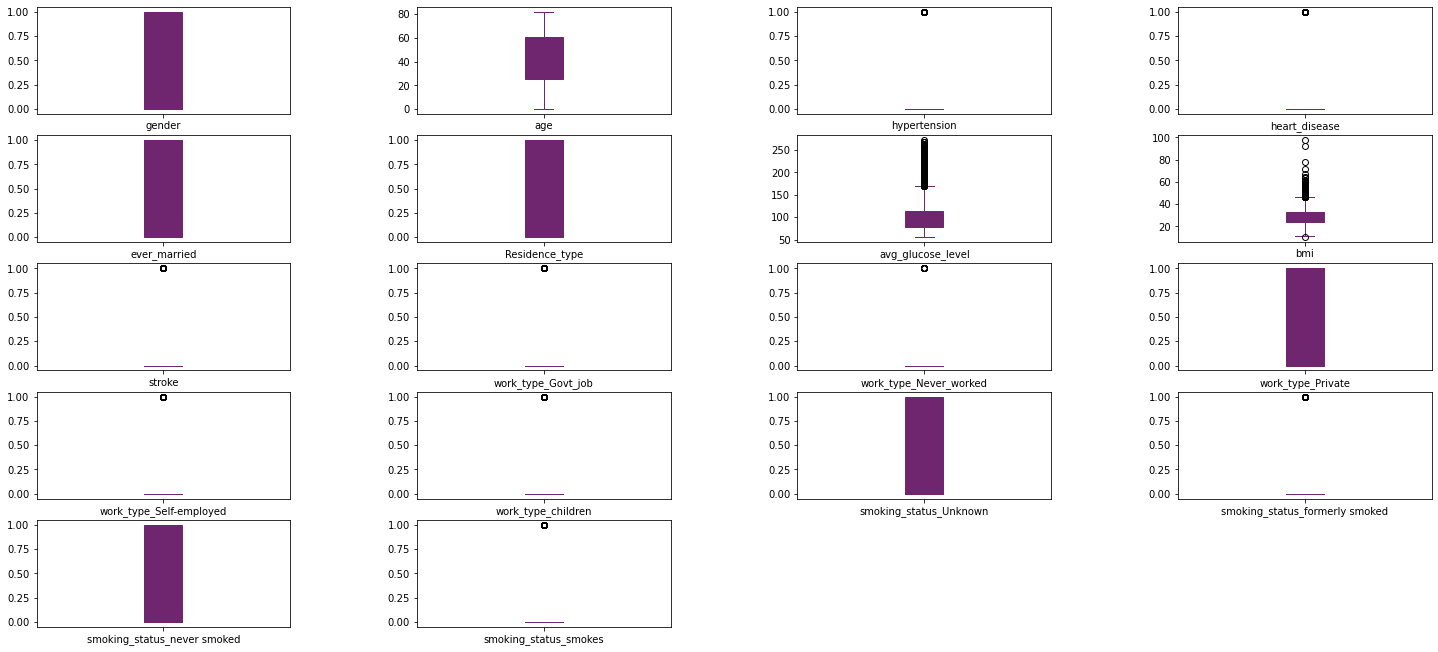

In [18]:
# plotting box plot for visualizing outliers

nums = df.select_dtypes(exclude=["category"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

- Removing outliers from 'avg_glucose_level' and 'bmi' column based on Z-score

In [19]:
# Calculate z-scores for 'column1' and 'column2'
z_scores_column1 = stats.zscore(df['bmi'])
z_scores_column2 = stats.zscore(df['avg_glucose_level'])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers_column1 = (abs(z_scores_column1) > threshold)
outliers_column2 = (abs(z_scores_column2) > threshold)

# Remove rows containing outliers in either column1 or column2
df_cleaned = df[~(outliers_column1 | outliers_column2)]
df_cleaned

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


- We can see that most of the data points are of '0' values meaning did not have stroke

<AxesSubplot:xlabel='stroke'>

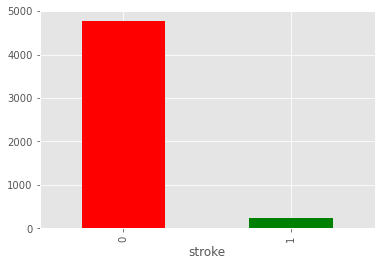

In [21]:
df_cleaned["stroke"].value_counts().plot(kind = "bar", color = ["red", "green"]) #visualizing the categories of our target variable

## Building Machine Learning Model

In [22]:
# defining target variable

X = df_cleaned.iloc[0:].drop('stroke',axis=1)
y = df_cleaned[['stroke']]

In [23]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
#scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Training Random Forest Model

In [25]:
#implementing random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

#accuracy of the model
print('Accuracy:', accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       937
           1       0.00      0.00      0.00        64

    accuracy                           0.93      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.88      0.93      0.90      1001

Accuracy: 0.9340659340659341


- We can see from above that, Precision for '0' is good, but for '1' it is very bad.
- It is because of the discrepancy in the dataset. We have so many more 0s than 1s.
- Hence, we need to balance the dataset by oversampling or undersampling.
- We'll employ oversampling technique using SMOTE

In [28]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [29]:
y_resampled.value_counts()

stroke
0         3826
1         3826
Name: count, dtype: int64

In [30]:
forest.fit(X_resampled, y_resampled)
y_pred_rf_smote = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf_smote))

#accuracy of the model
print('Accuracy:', accuracy_score(y_test,y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       937
           1       0.14      0.11      0.12        64

    accuracy                           0.90      1001
   macro avg       0.54      0.53      0.53      1001
weighted avg       0.89      0.90      0.89      1001

Accuracy: 0.9000999000999002


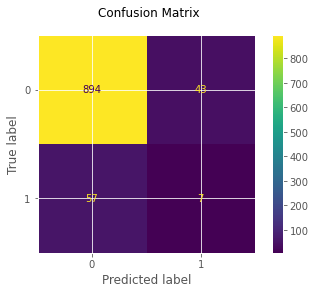

In [39]:
fig = plot_confusion_matrix(forest, X_test_scaled, y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

## Now, the Precision for '1' is improved

- Now, we'll do hyperparameter tuning using GridSearchCV to find the optimal hyperparameters 

In [33]:
rfc = RandomForestClassifier()

grid = {"n_estimators": range(10, 201, 10),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 101, 20)
              }

rfc_rs = GridSearchCV(rfc, 
                            param_grid = grid,
                            cv = 5, 
                            n_jobs = 10, 
                            scoring = "accuracy")

rfc_rs.fit(X_resampled, y_resampled)
#best parameters from gridsearchCV
print(rfc_rs.best_params_)

#best accuracy score
print(rfc_rs.best_score_)

# Make predictions on the test set
y_pred_test_ht = rfc_rs.predict(X_test_scaled)

# Evaluate the performance on the test set using a classification report
classification_report_str_test = classification_report(y_test, y_pred_test_ht)

print("Classification Report (Test Set):")
print(classification_report_str_test)

{'max_depth': 70, 'max_features': 'log2', 'n_estimators': 160}
0.9607972917013529
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       937
           1       0.14      0.11      0.12        64

    accuracy                           0.90      1001
   macro avg       0.54      0.53      0.54      1001
weighted avg       0.89      0.90      0.89      1001



## In the same way, we can also use any other ML model

- Now, we'll try with Multi Layer Perceptron

In [35]:
mlp = MLPClassifier()
mlp.fit(X_resampled, y_resampled)

MLPClassifier()

In [36]:
y_pred_mlp_smote = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_mlp_smote))

#accuracy of the model
print('Accuracy:', accuracy_score(y_test,y_pred_mlp_smote))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       937
           1       0.12      0.16      0.14        64

    accuracy                           0.88      1001
   macro avg       0.53      0.54      0.54      1001
weighted avg       0.89      0.88      0.88      1001

Accuracy: 0.8751248751248751


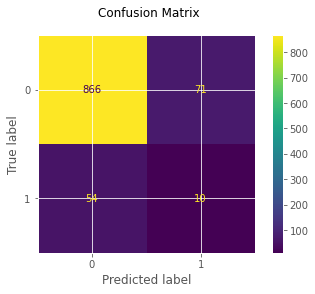

In [38]:
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

- From the above two results, we can say that Random Forest model is performing better

##  Feature selection with Pearson's Correlation Coefficient

<AxesSubplot:>

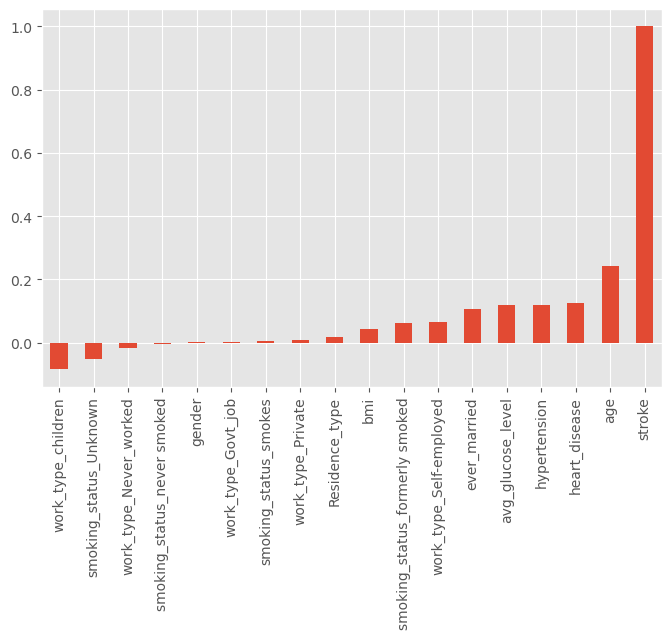

In [40]:
plt.figure(figsize=(8,5),dpi=100)
df_cleaned.corr()['stroke'].sort_values().plot(kind='bar')

In [41]:
df_cleaned.corr()['stroke'].sort_values()

work_type_children               -0.083935
smoking_status_Unknown           -0.052574
work_type_Never_worked           -0.014889
smoking_status_never smoked      -0.004557
gender                            0.003346
work_type_Govt_job                0.003848
smoking_status_smokes             0.006118
work_type_Private                 0.008683
Residence_type                    0.017887
bmi                               0.044924
smoking_status_formerly smoked    0.064060
work_type_Self-employed           0.066375
ever_married                      0.106695
avg_glucose_level                 0.120517
hypertension                      0.120867
heart_disease                     0.126521
age                               0.243827
stroke                            1.000000
Name: stroke, dtype: float64

- We'll only keep the feature that are somewhat correlated with our target variable 'stroke'

In [42]:
X1 = df_cleaned[['hypertension', 'ever_married', 'avg_glucose_level', 'heart_disease', 'age']]
y1 = df_cleaned[['stroke']]

#splitting the data into train-test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1, y1, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_new)
X_test_sc = scaler.transform(X_test_new)

In [43]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_new, y_resampled_new = smote.fit_resample(X_train_sc, y_train_new)

In [45]:
forest.fit(X_resampled_new, y_resampled_new)
y_pred_rf_smote_new = forest.predict(X_test_sc)
print(classification_report(y_test_new, y_pred_rf_smote_new))

#accuracy of the model
print('Accuracy:', accuracy_score(y_test,y_pred_rf_smote_new))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       954
           1       0.13      0.30      0.18        47

    accuracy                           0.88      1001
   macro avg       0.55      0.60      0.56      1001
weighted avg       0.92      0.88      0.90      1001

Accuracy: 0.8471528471528471
